# Project Name
# Live Class Monitoring System(Face Emotion Recognition)
 
# This is a Team Project and here is a Notebook:-

# 1. Aniket Deulkar
 
# 2. Aniket Nichat

# 3. Rohit Thawali


# Project Indroduction

# The Indian education landscape has been undergoing rapid changes for the past 10 years owing to the advancement of web-based learning services, specifically, eLearning platforms.

# Global E-learning is estimated to witness an 8X over the next 5 years to reach USD 2B in 2021. India is expected to grow with a CAGR of 44% crossing the 10M users mark in 2021. Although the market is growing on a rapid scale, there are major challenges associated with digital learning when compared with brick and mortar classrooms.

# One of many challenges is how to ensure quality learning for students. Digital platforms might overpower physical classrooms in terms of content quality but when it comes to understanding whether students are able to grasp the content in a live class scenario is yet an open-end challenge.

# In a physical classroom during a lecturing teacher can see the faces and assess the emotion of the class and tune their lecture accordingly, whether he is going fast or slow. He can identify students who need special attention.

# Digital classrooms are conducted via video telephony software program (exZoom) where it’s not possible for medium scale class (25-50) to see all students and access the mood. Because of this drawback, students are not focusing on content due to lack of surveillance.

# While digital platforms have limitations in terms of physical surveillance but it comes with the power of data and machines which can work for you. It provides data in the form of video, audio, and texts which can be analysed using deep learning algorithms.


# Deep learning backed system not only solves the surveillance issue, but it also removes the human bias from the system, and all information is no longer in the teacher’s brain rather translated in numbers that can be analysed and tracked.





## About the Dataset
The data consists of 48*48 pixel grayscale face images. The images are centered and occupy an equal amount of space. This dataset consist of facial emotions of following categories:

0:angry        
1:disgust     
2:feat     
3:happy     
4:sad     
5:surprise     
6:natural   

The training set consists of 28,709 examples and the public test set consists of 3,589 examples.

## Method 1: Explore dataset

## Import libraries

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2

import warnings
warnings.filterwarnings('ignore')

from PIL import Image
import tensorflow as tf
from IPython.display import Image 

from sklearn.model_selection import train_test_split
from skimage.transform import resize
from sklearn.metrics import accuracy_score

from keras.applications import ResNet50
from keras.applications.nasnet import NASNetLarge
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, EarlyStopping,ModelCheckpoint
from keras.utils import plot_model
import keras.backend as K


In [23]:
# Count the images in test file
test = {}
count = 0
for folder in os.listdir('../input/fer2013/test'):
    temp = []
    for files in os.listdir(f"../input/fer2013/test/{folder}"):
        temp.append(files)
    count += len(temp)
    test[folder] = temp
    print(f"{folder} has {len(temp)} images")
print(f"Total images in all folders are {count}")

surprise has 831 images
fear has 1024 images
angry has 958 images
neutral has 1233 images
sad has 1247 images
disgust has 111 images
happy has 1774 images
Total images in all folders are 7178


In [24]:
# Count the images in train file
train = {}
count = 0
for folder in os.listdir('../input/fer2013/train'):
    temp = []
    for files in os.listdir(f"../input/fer2013/train/{folder}"):
        temp.append(files)
    count += len(temp)
    train[folder] = temp
    print(f"{folder} has {len(temp)} images")
print(f"Total images in all folders are {count}")

surprise has 3171 images
fear has 4097 images
angry has 3995 images
neutral has 4965 images
sad has 4830 images
disgust has 436 images
happy has 7215 images
Total images in all folders are 28709


In [25]:
# training dataframe with folder name as index
train_df = pd.DataFrame.from_dict(train.values())
train_df.index = train.keys()
train_df

0                      1                      2     \
surprise  Training_66056468.jpg  Training_26522394.jpg  Training_63239185.jpg   
fear      Training_80689648.jpg  Training_30574616.jpg  Training_59584482.jpg   
angry     Training_52322132.jpg  Training_93516694.jpg  Training_59490301.jpg   
neutral   Training_98425931.jpg  Training_38941586.jpg  Training_95659938.jpg   
sad       Training_89959053.jpg  Training_20087082.jpg  Training_13633741.jpg   
disgust   Training_54996784.jpg  Training_19209073.jpg  Training_33099414.jpg   
happy     Training_65647822.jpg   Training_6949915.jpg  Training_16474445.jpg   

                           3                      4                      5     \
surprise  Training_67725241.jpg  Training_71308969.jpg  Training_49242724.jpg   
fear       Training_6157502.jpg  Training_11927588.jpg   Training_9725738.jpg   
angry     Training_20556787.jpg  Training_98419709.jpg  Training_49369148.jpg   
neutral   Training_15127575.jpg  Training_55394334.jpg  Training_11091741.jpg   
sad       Training_87971378.jpg  Training_41661309.jpg  Training_54602400.jpg   
disgust   Training_99947220.jpg  Training_35846483.jpg  Training_39831964.jpg   
happy     Training_56050083.jpg  Training_17268365.jpg  Training_45115516.jpg   

                           6                      7                      8     \
surprise  Training_69351834.jpg  Training_67440750.jpg  Training_93942694.jpg   
fear      Training_19260251.jpg  Training_63767429.jpg  Training_27844176.jpg   
angry     Training_82270754.jpg  Training_39597202.jpg  Training_36418028.jpg   
neutral   Training_85539054.jpg  Training_64471954.jpg  Training_37559823.jpg   
sad       Training_40233889.jpg  Training_13307281.jpg  Training_84900551.jpg   
disgust   Training_82509083.jpg   Training_5242503.jpg  Training_42047667.jpg   
happy      Training_4185635.jpg  Training_34273117.jpg  Training_99278519.jpg   

                           9     ...                   7205  \
surprise  Training_11693705.jpg  ...                   None   
fear       Training_5599228.jpg  ...                   None   
angry     Training_50920333.jpg  ...                   None   
neutral   Training_34560958.jpg  ...                   None   
sad       Training_22093911.jpg  ...                   None   
disgust   Training_20322339.jpg  ...                   None   
happy     Training_31588747.jpg  ...  Training_16109497.jpg   

                           7206                   7207                   7208  \
surprise                   None                   None                   None   
fear                       None                   None                   None   
angry                      None                   None                   None   
neutral                    None                   None                   None   
sad                        None                   None                   None   
disgust                    None                   None                   None   
happy     Training_59802408.jpg  Training_23983839.jpg  Training_61893124.jpg   

                           7209                   7210                   7211  \
surprise                   None                   None                   None   
fear                       None                   None                   None   
angry                      None                   None                   None   
neutral                    None                   None                   None   
sad                        None                   None                   None   
disgust                    None                   None                   None   
happy     Training_87865303.jpg  Training_18866880.jpg  Training_16513509.jpg   

                           7212                   7213                   7214  
surprise                   None                   None                   None  
fear                       None                   None                   None  
angry                      None      

In [26]:
# list of all the emotions to classify in the output
emotions = [k for k in train.keys()]

In [27]:
base_dir = '../input/fer2013/'

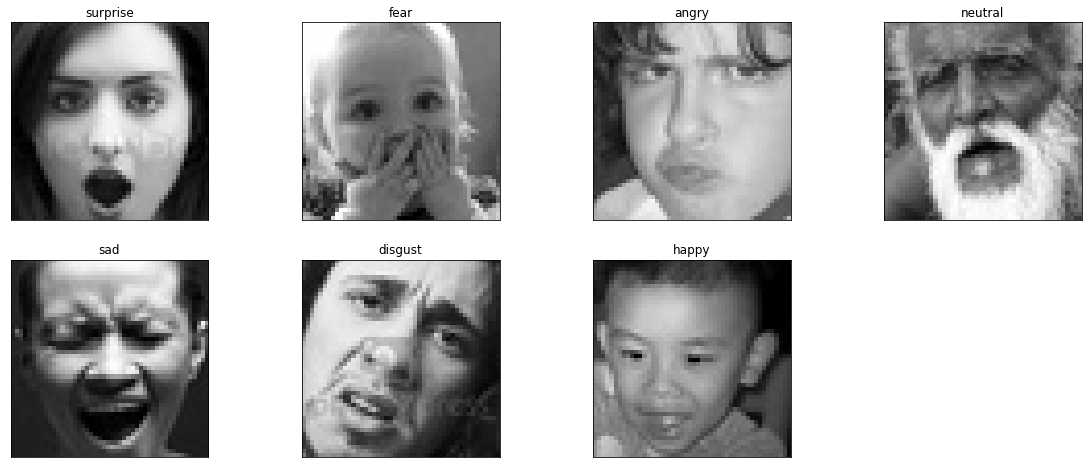

In [28]:
# lets see one image from each category from training data
plt.figure(figsize = (20, 8))
for i in range(7):
    ax = plt.subplot(2,4, i+1)
    img = cv2.imread(f"{base_dir}train/{emotions[i]}/{train_df.loc[emotions[i], i+7]}")
    ax.imshow(img, cmap = 'gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(emotions[i])

In [29]:
# To know the shape of image
one_img = cv2.imread('../input/fer2013/train/surprise/Training_10013223.jpg')
one_img.shape

(48, 48, 3)

Keras `ImageDataGenerator` is a gem! It lets you augment your images in real-time while your model is still training! You can apply any random transformations on each training image as it is passed to the model. This will not only make your model robust but will also save up on the overhead memory!     

The ImageDataGenerator class has three methods `flow(), flow_from_directory()` and `flow_from_dataframe()` to read the images from a big numpy array and folders containing images. 

In this the `flow_from_directory()` is used because it expects at least one directory under the given directory path

In [30]:
# Data augmentation
train_dir = f"{base_dir}/train"
test_dir = f"{base_dir}/test"
train_datagen = ImageDataGenerator(width_shift_range = 0.1,
                                    height_shift_range = 0.1,
                                    horizontal_flip = True,
                                    rescale = 1./255,
                                    #zoom_range = 0.2,
                                    rotation_range= 5, 
                                    shear_range= 0.2,
                                   fill_mode = 'nearest'
                                    )
test_datagen = ImageDataGenerator(rescale= 1.0/255)

train_generator = train_datagen.flow_from_directory(
                        train_dir,
                        target_size=(48,48),
                        batch_size=64,
                        class_mode='categorical',
                        subset = "training")
test_generator = test_datagen.flow_from_directory(
                        test_dir,
                        target_size=(48,48),
                        batch_size=64,
                        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


We can design the architecture of the CNN model by adding Convolution layers and pooling layers, but here I am using the weights of already trained model `ResNet50`

In [32]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

# model compilation
model.compile(loss = 'categorical_crossentropy', optimizer =Adam(lr=0.0001, decay=1e-6), metrics =['accuracy'])

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 46, 46, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 44, 44, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 20, 20, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 128)        

## ResNet50

Steps:
1. make a instance of ResNet50
2. freezing the layers
3. build model
4. compile the model
5. fit the model
6. make predictions

In [34]:
base_model = ResNet50(input_shape=(48,48,3),include_top = False, weights = 'imagenet')

len(base_model.layers)

175

In [35]:
# Freezing layers 
for layer in base_model.layers[:-4]:
    layer.trainable = False

In [36]:
# Build model on the top of base model
model = Sequential()

model.add(base_model)
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())

# fully connected layer-1
model.add(Dense(128, kernel_initializer = 'he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# fully connected layer-2
model.add(Dense(64, kernel_initializer = 'he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# fully connected layer-3
model.add(Dense(32, kernel_initializer = 'he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# output layer
model.add(Dense(7, activation = 'softmax'))

# model Summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2, 2, 2048)        23587712  
_________________________________________________________________
dropout_7 (Dropout)          (None, 2, 2, 2048)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 8192)              32768     
_________________________________________________________________
dense_6 (Dense)              (None, 128)               1048704   
_________________________________________________________________
batch_normalization_5 (Batch (None, 128)               512       
_________________________________________________________________
activation_3 (Activation)    (None, 128)              

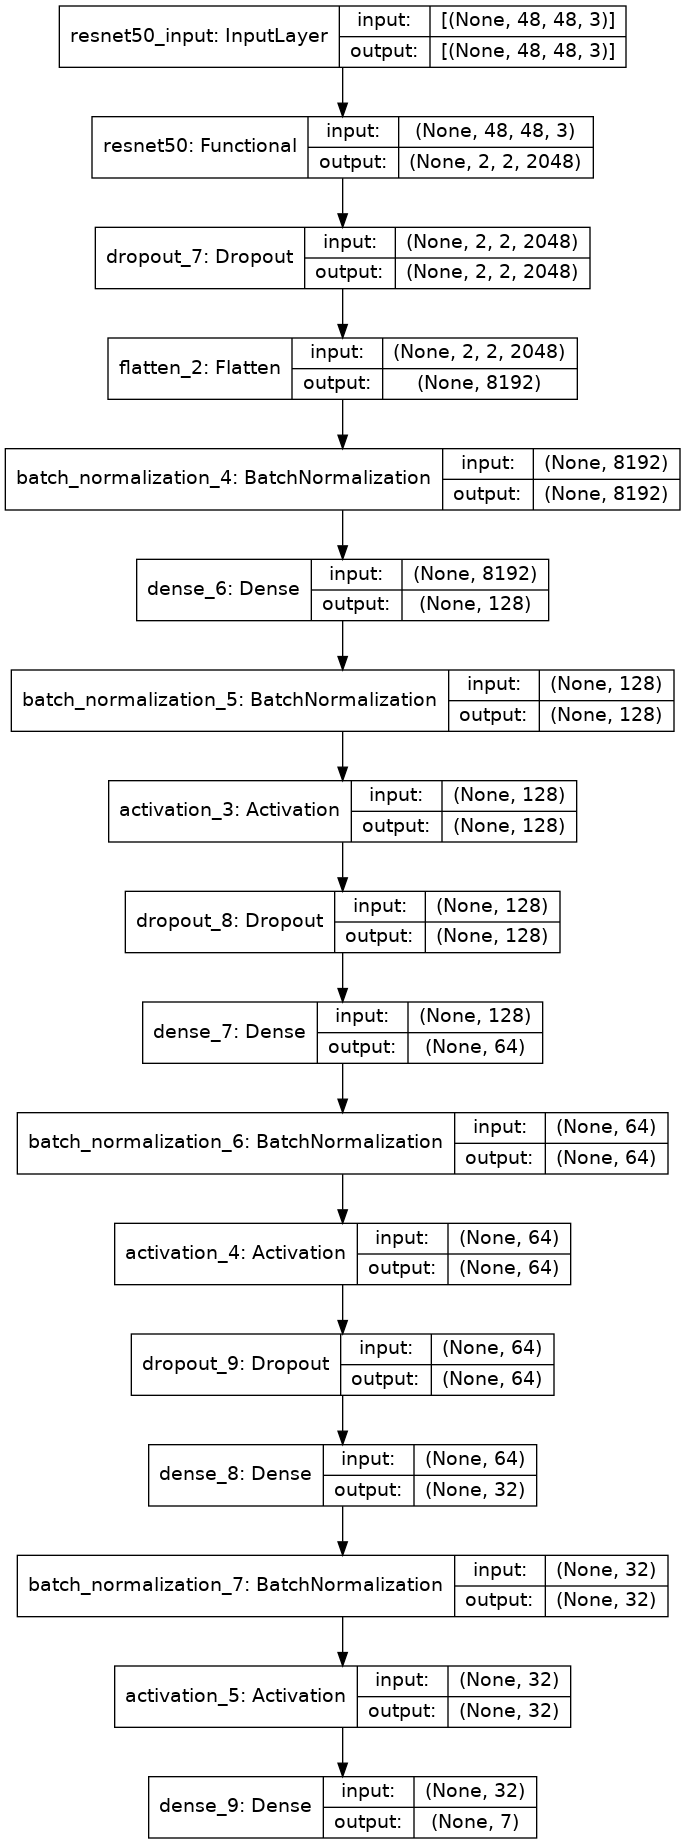

In [37]:
plot_model(model, to_file= 'convnet.png', show_shapes= True)
Image(filename='convnet.png')

In [40]:
# function to calculate f1_score
def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [41]:
# evaluation metrics
from keras.metrics import AUC, BinaryAccuracy, Precision, Recall
metric = [BinaryAccuracy(name = 'accuracy'), 
           Precision(name = 'precision'), 
           Recall(name = 'recall'), 
           AUC(name = 'AUC'),
           ]

In [43]:
# callbacks
checkpoint = ModelCheckpoint('model.h5')

earlystop = EarlyStopping(patience=20, 
                          verbose=1)
#                           restore_best_weights=True)
                        
reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.5, 
                              patience=20, 
                              verbose=1,
                              min_lr=1e-10)
#                               min_delta=0.0001)
callbacks = [checkpoint,earlystop,reduce_lr]

In [44]:
# compile model
model.compile(optimizer= 'Adam', loss='categorical_crossentropy', metrics=metric)

The difference between Keras.fit and Keras.fit_generator functions used to train a deep learning neural network:    
* `model.fit` is used when the entire training dataset can fit into the memory and no data augmentation is applied.    
* `model.fit_generator` is used when either we have a huge dataset to fit into our memory or when data augmentation needs to be applied.

In [45]:
# model fitting
history = model.fit_generator(train_generator, validation_data=test_generator,epochs=60,verbose = 1,callbacks=callbacks)

Epoch 1/60
449/449 [==============================] - 185s 395ms/step - loss: 2.0173 - accuracy: 0.8540 - precision: 0.2137 - recall: 0.0080 - AUC: 0.5585 - val_loss: 1.8201 - val_accuracy: 0.8570 - val_precision: 0.1111 - val_recall: 1.3931e-04 - val_AUC: 0.6494
Epoch 2/60
449/449 [==============================] - 52s 115ms/step - loss: 1.8179 - accuracy: 0.8567 - precision: 0.3150 - recall: 0.0023 - AUC: 0.6527 - val_loss: 1.7883 - val_accuracy: 0.8568 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_AUC: 0.6676
Epoch 3/60
449/449 [==============================] - 51s 114ms/step - loss: 1.7905 - accuracy: 0.8569 - precision: 0.2903 - recall: 0.0012 - AUC: 0.6669 - val_loss: 1.7728 - val_accuracy: 0.8571 - val_precision: 0.2500 - val_recall: 1.3931e-04 - val_AUC: 0.6907
Epoch 4/60
449/449 [==============================] - 49s 109ms/step - loss: 1.7712 - accuracy: 0.8571 - precision: 0.4874 - recall: 0.0043 - AUC: 0.6793 - val_loss: 1.7439 - val_accuracy: 0.8571 - val_prec

In [46]:
model.save('model_optimal.h5')
model.save_weights('model_weights.h5')

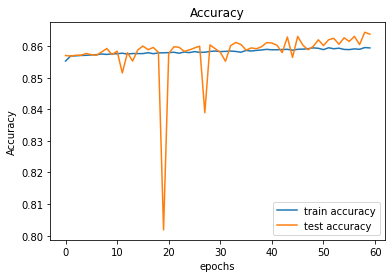

In [47]:
plt.figure(0)
plt.plot(history.history['accuracy'], label= 'train accuracy')
plt.plot(history.history['val_accuracy'], label= 'test accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()

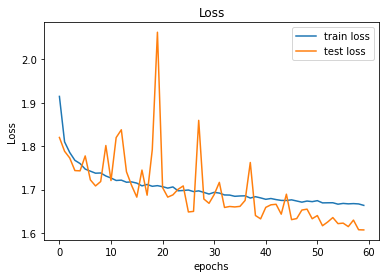

In [48]:
plt.figure(0)
plt.plot(history.history['loss'], label= 'train loss')
plt.plot(history.history['val_loss'], label= 'test loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()

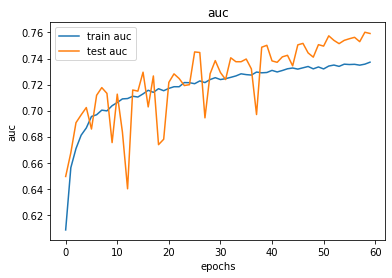

In [49]:
plt.figure(0)
plt.plot(history.history['AUC'], label= 'train auc')
plt.plot(history.history['val_AUC'], label= 'test auc')
plt.title('auc')
plt.xlabel('epochs')
plt.ylabel('auc')
plt.legend()

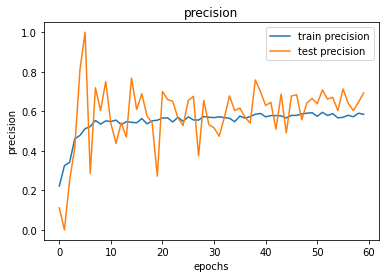

In [50]:
plt.figure(0)
plt.plot(history.history['precision'], label= 'train precision')
plt.plot(history.history['val_precision'], label= 'test precision')
plt.title('precision')
plt.xlabel('epochs')
plt.ylabel('precision')
plt.legend()

#      When We Fitting the Model, We get train accuracy is 85.92 and test  accuracy  86.38 is slightly best for our Model. We used ResNet50, ResNet50 is a variant of ResNet model which has 48 Convolution layers along with 1 MaxPool and 1 Average Pool layer. It has 3.8 x 10^9 Floating points operations. It is a widely used ResNet model and we have explored ResNet50 architecture in depth.

#  Method 2 : We use Kaggle for Running our training set

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/13288.jpg
/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/24201.jpg
/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/26556.jpg
/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/26076.jpg
/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/27577.jpg
/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/27973.jpg
/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/26452.jpg
/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/10162.jpg
/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/12768.jpg
/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/12551.jpg
/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/13205.jpg
/kaggle/input/face-expression-recognition-d

# Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

# Displaying Images

In [ ]:
picture_size = 48
folder_path = "../input/face-expression-recognition-dataset/images/"


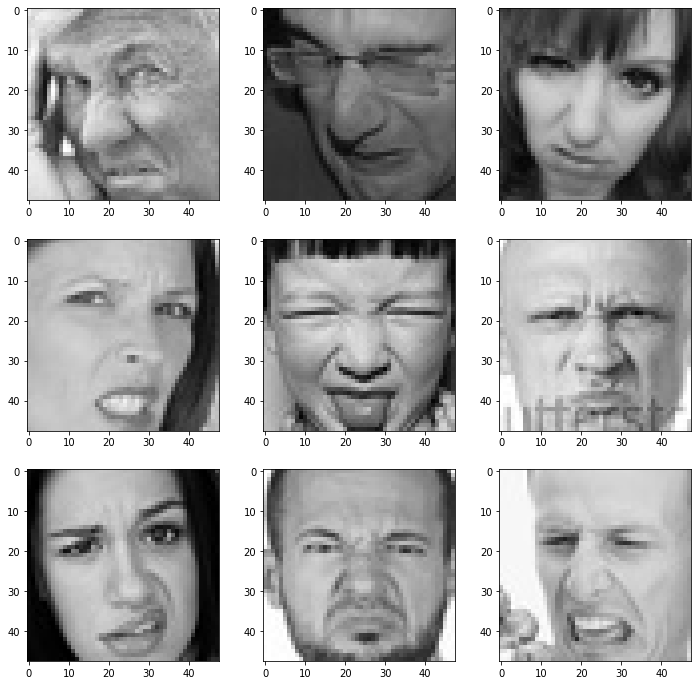

In [ ]:
expression = 'disgust'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

In [ ]:

batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


# Making Training and Validation Data

In [ ]:
from keras.optimizers import Adam,SGD,RMSprop


no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

# Fitting the Model with Training and Validation Data

In [ ]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [ ]:
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )


/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/48
225/225 [==============================] - 724s 3s/step - loss: 1.9424 - accuracy: 0.2502 - val_loss: 1.5147 - val_accuracy: 0.4159
Epoch 2/48
225/225 [==============================] - 671s 3s/step - loss: 1.4837 - accuracy: 0.4302 - val_loss: 1.3755 - val_accuracy: 0.4753
Epoch 3/48
225/225 [==============================] - 671s 3s/step - loss: 1.2894 - accuracy: 0.5078 - val_loss: 1.3673 - val_accuracy: 0.4842
Epoch 4/48
225/225 [==============================] - 670s 3s/step - loss: 1.1938 - accuracy: 0.5437 - val_loss: 1.3073 - val_accuracy: 0.4923
Epoch 5/48
225/225 [==============================] - 671s 3s/step - loss: 1.1301 - accuracy: 0.5662 - val_loss: 1.1679 - val_accuracy: 0.5503
Epoch 6/48
225/225 [==============================] - 671s 3s/step - loss: 1.0757 - accuracy: 0.5897 - val_loss: 1.1465 - val_accuracy: 0.5682
Epoch 7/48
225/225 [==============================] - 666s 3s/step - loss: 1.0187 - accuracy: 0.6179 - val_loss: 1.3776 - val_accuracy: 0.5051

# This way we  ran  epoch it take on my system 3 hrs for only 11 epoch . using early stopping it stop at 11 if we don't use 
# early stopping it take around 24hrs to ran that epoch because we do not good computational faster computer. We tried most thing like use 
# but i approach use transfer learning with new version MobileNet v2 but in my system it not ran properly so that's why we use only two method

# Plotting Accuracy & Loss

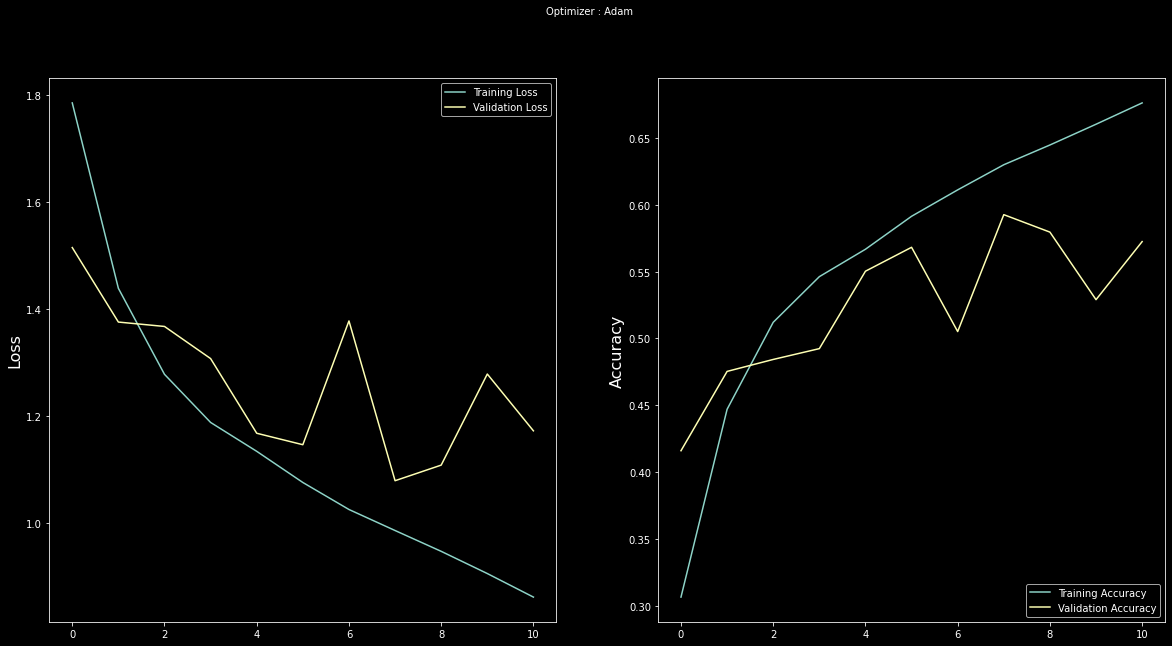

In [ ]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# After the all things we plot accuracy graph it quite good accuracy but we want more accuracy because if we use tranfer learning then accuracy are improve
# but we early said we don't have much faster system so this would be best experience for learning purpose and it meet our requirement 
# We get accuracy in train around 66% and for vaild 56% . But we not stop here we improve the project.
    

# Method 2 : Using deepface we predict the emotion

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
pip install deepface


     |████████████████████████████████| 61kB 4.7MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.3MB 17.5MB/s 
  Created wheel for gdown: filename=gdown-3.13.0-cp37-none-any.whl size=9046 sha256=e344c7e1d69246955a0599ee4d618896d030907734391e75bfe40fb226731706
  Stored in directory: /root/.cache/pip/wheels/ba/fa/c5/12813d7496f34652c43a471e11a780e769889d06e34735c32e
Successfully built gdown
  Found existing installation: gdown 3.6.4
    Uninstalling gdown-3.6.4:
      Successfully uninstalled gdown-3.6.4


In [2]:
import cv2

In [9]:
img = cv2.imread("/content/drive/MyDrive/face/download.jpg")

In [10]:
# Analyze Image using DeepFace
from deepface import DeepFace

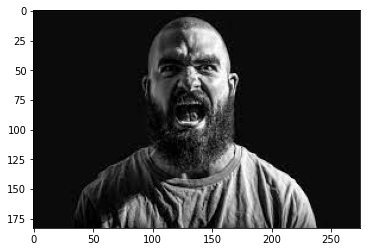

In [11]:
plt.imshow(img)

In [12]:
predictions = DeepFace.analyze(img)

facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:00<00:00, 17.4MB/s]


age_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: /root/.deepface/weights/age_model_weights.h5
100%|██████████| 539M/539M [00:09<00:00, 54.2MB/s]


gender_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: /root/.deepface/weights/gender_model_weights.h5
100%|██████████| 537M/537M [00:14<00:00, 37.4MB/s]


race_model_single_batch.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/race_model_single_batch.h5
To: /root/.deepface/weights/race_model_single_batch.h5
100%|██████████| 537M/537M [00:07<00:00, 72.3MB/s]
Action: race: 100%|██████████| 4/4 [00:02<00:00,  1.59it/s]


In [13]:
predictions

{'age': 39,
 'dominant_emotion': 'angry',
 'dominant_race': 'middle eastern',
 'emotion': {'angry': 99.08357847733241,
  'disgust': 0.006235002381103397,
  'fear': 0.8266986401913929,
  'happy': 6.934323098581078e-06,
  'neutral': 0.004164734624173522,
  'sad': 0.07931691142969267,
  'surprise': 7.756402667743905e-07},
 'gender': 'Man',
 'race': {'asian': 0.6359536200761795,
  'black': 1.041712611913681,
  'indian': 8.63187089562416,
  'latino hispanic': 16.21260643005371,
  'middle eastern': 42.629021406173706,
  'white': 30.848833918571472},
 'region': {'h': 83, 'w': 83, 'x': 92, 'y': 15}}

In [15]:
predictions["dominant_emotion"]

'angry'

# We are trying to draw a rectangle across the face

In [38]:
faceCascade = cv2.CascadeClassifier('/content/drive/MyDrive/face/haarcascade_frontalface_default.xml')

In [39]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = faceCascade.detectMultiScale(gray,1.1,4)

for(x,y,w,h) in faces:
  cv2.rectangle(img, (x , y) , (x+w, y+h) , (0 , 255 , 0) , 2)


In [40]:
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,
            
            predictions["dominant_emotion"],
            (0, 50),
            font,1,
            (0, 0, 255),
            2,
            cv2.LINE_4) ;

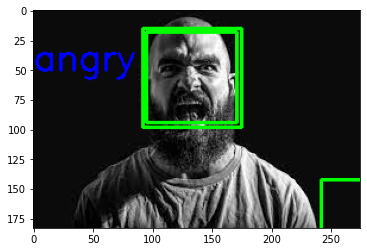

In [41]:
plt.imshow(img)

# Thus we have get rectangle on face and predict right emotion after this we create real time emotion detection webcam . Using deepface it quite good but sometime it take wrong like age if you see the age is told 39 that was right as well as worong we try most images in deepface, This was end of our project. 

# Some real life experience form project
# Understand the deep concept of project
# Don't afraid to faliure 
# From more faliure you get more experience and success will come
# Never give up
# Have some patience good things happen
# Try new things and execute your idea